#### **Import Libraries**

In [165]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

from tqdm import tqdm
from ast import literal_eval
import warnings
warnings.filterwarnings('ignore')

# Importing Data

In [166]:

df = pd.read_csv("C://Users/milin/Documents/AI_ML/CApstone Project/movies_metadata.csv")
keywords = pd.read_csv("C://Users/milin/Documents/AI_ML/CApstone Project/keywords.csv")
credits = pd.read_csv("C://Users/milin/Documents/AI_ML/CApstone Project/credits.csv")

In [167]:
df.loc[df.original_title == "Avatar"]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
14551,False,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",...,2009-12-10,2.787965e+09,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,Avatar,False,7.2,12114.0


In [168]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

Let's check null values

In [170]:
df.isna().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

# Exploratary Data Analysis & Visualizations

In [171]:
df['genres'] = df['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
s = df.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'
gen_df = df.drop('genres', axis=1).join(s)

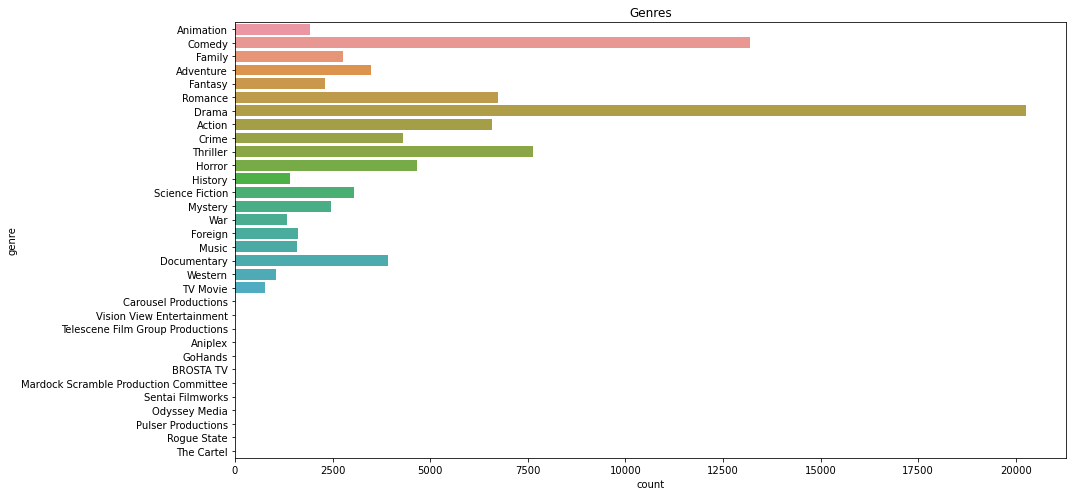

In [172]:
plt.figure(figsize = (15,7))
sns.countplot(y =gen_df.genre)
plt.title("Genres")
plt.tight_layout()

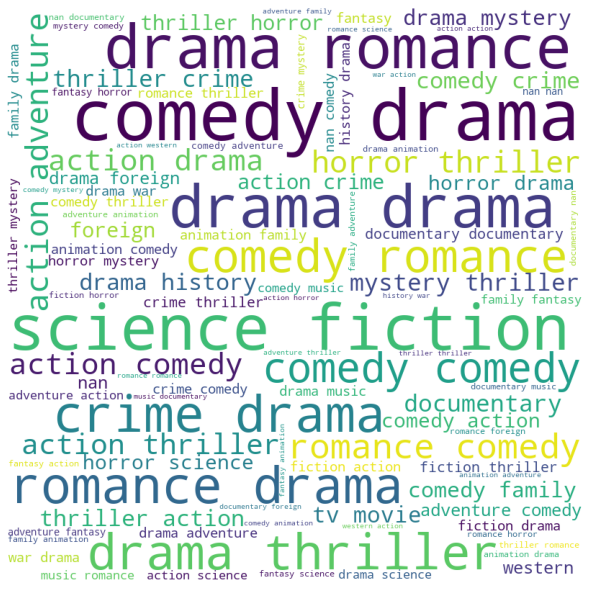

In [173]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

comment_words = ''

 
# iterate through the csv file
for val in gen_df["genre"]:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

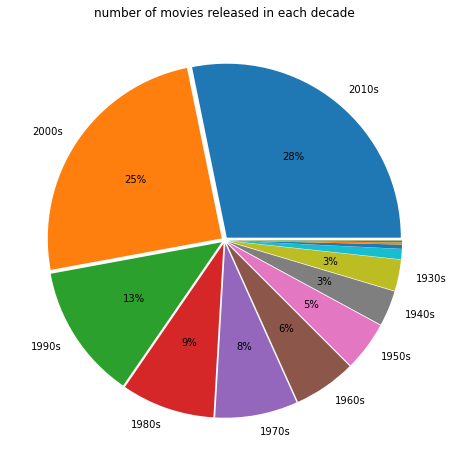

In [174]:
# numbers of movies released in each decade
def count_pie(series):
    counts=series.value_counts()
    counts=counts/counts.sum()
    labels=['' if num<0.01 else str(year) for (year,num) in counts.items()]
    f, ax = plt.subplots(figsize=(8, 8))
    explode = [0.02 if counts.iloc[i] < 100 else 0.001 for i in range(counts.size)]
    plt.pie(counts,labels=labels,autopct=lambda x:'{:1.0f}%'.format(x) if x > 1 else '',explode=explode)
    plt.title("number of movies released in each decade")
    plt.show()

def count_decade_pie(df):
    count_pie(df.release_date.dropna().apply(lambda x:str(int(x[:4])//10*10)+'s'))

count_decade_pie(df)

In [175]:
df2 = gen_df.groupby(["genre"]).sum()
df2.reset_index(inplace=True)

In [176]:
gen_df.loc[gen_df.original_title == "Avatar"].revenue.value_counts().astype(int)

2.787965e+09    4
Name: revenue, dtype: int32

Text(0.5, 1.0, 'Vote Average vs Genres')

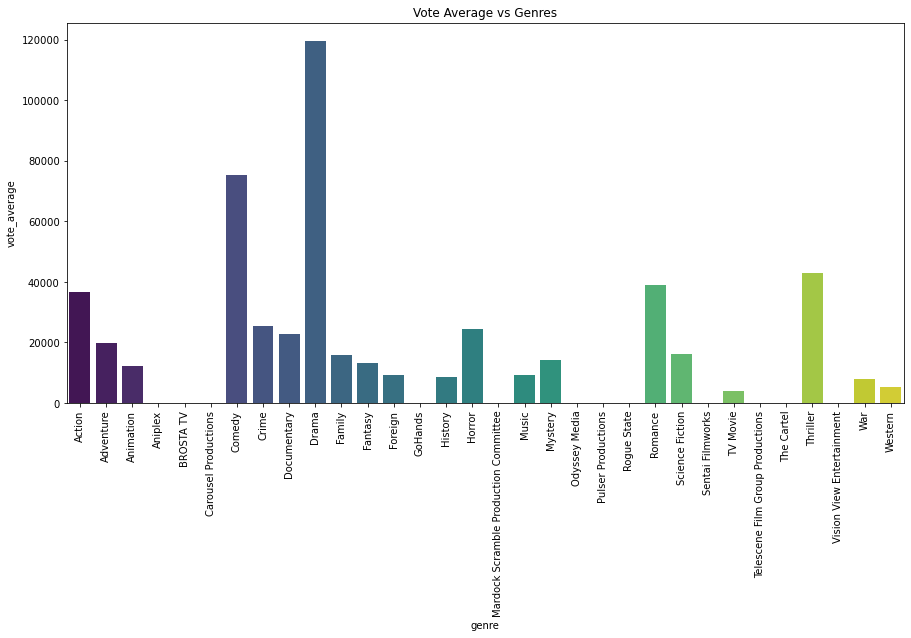

In [177]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,7))
sns.barplot(x="genre", y='vote_average', data=df2, ci = None, palette = "viridis")
plt.xticks(rotation='vertical')
plt.title("Vote Average vs Genres")

Text(0.5, 1.0, 'Revenue total per each genres')

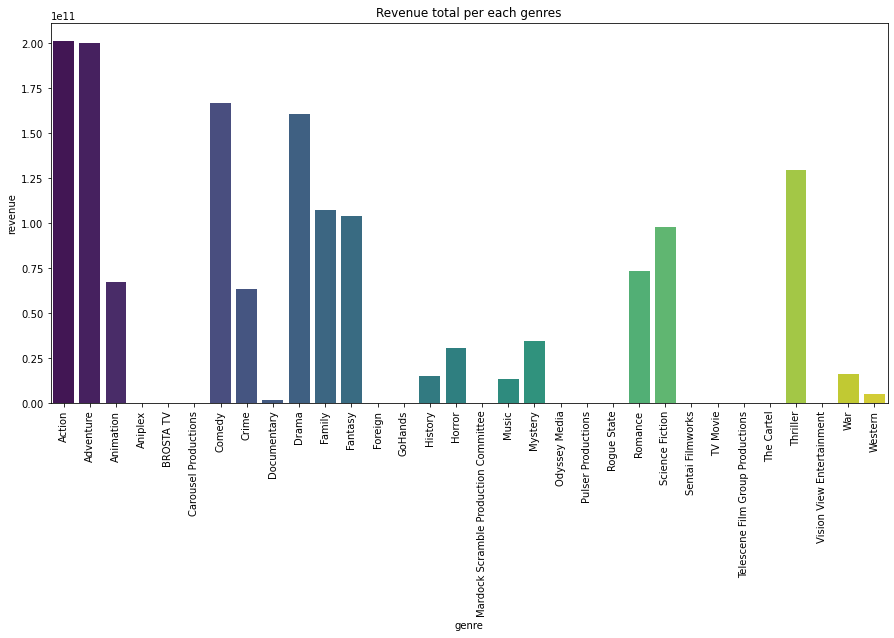

In [178]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,7))
sns.barplot(x="genre", y='revenue', data=df2, ci = None, palette = "viridis")
plt.xticks(rotation='vertical')
plt.title("Revenue total per each genres")

In [179]:
temp_df = gen_df[["title", "revenue"]]
temp_df = temp_df.drop_duplicates()

In [180]:
temp_df.head()

,title,revenue
0,Toy Story,373554033.0
1,Jumanji,262797249.0
2,Grumpier Old Men,0.0
3,Waiting to Exhale,81452156.0
4,Father of the Bride Part II,76578911.0


In [181]:

temp_df = temp_df.sort_values(by='revenue', ascending=False)
temp_df = temp_df[["title", 'revenue']][:20]
#temp_df.revenue = temp_df.revenue.astype(int)
temp_df

,title,revenue
14551,Avatar,2.787965e+09
26555,Star Wars: The Force Awakens,2.068224e+09
1639,Titanic,1.845034e+09
17818,The Avengers,1.519558e+09
25084,Jurassic World,1.513529e+09
28830,Furious 7,1.506249e+09
26558,Avengers: Age of Ultron,1.405404e+09
17437,Harry Potter and the Deathly Hallows: Part 2,1.342000e+09
22110,Frozen,1.274219e+09
42222,Beauty and the Beast,1.262886e+09


Text(0.5, 1.0, 'Highest Revenues')

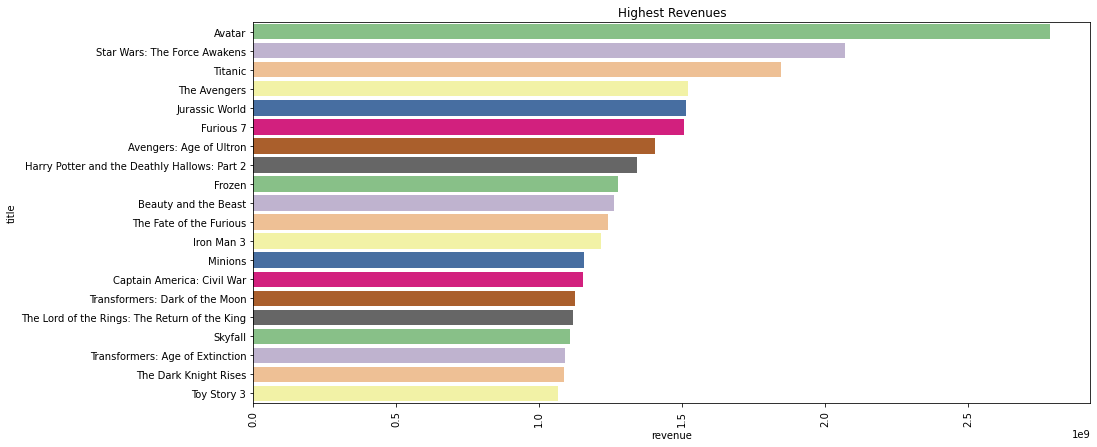

In [182]:
plt.figure(figsize = (15,7))
sns.barplot(x="revenue", y='title', data=temp_df,ci = None, palette = "Accent")
plt.xticks(rotation='vertical')
plt.title("Highest Revenues")

### Let's start!

In [183]:
df = pd.read_csv("C://Users/milin/Documents/AI_ML/CApstone Project/movies_metadata.csv")

#### Let's get rid of the films who have under 100 votes.

In [184]:
df = df[df['vote_count']>=100]

In [185]:
# we will use overview & genres features from metadata
df = df[['id','original_title','overview','genres']]

In [186]:
# Creating a duplicate column, in case if its needed.
df['title'] = df['original_title'].copy()

In [187]:
df.reset_index(inplace=True, drop=True)
df.head()

,id,original_title,overview,genres,title
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",Toy Story
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",Jumanji
2,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,"[{'id': 35, 'name': 'Comedy'}]",Father of the Bride Part II
3,949,Heat,"Obsessive master thief, Neil McCauley leads a ...","[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",Heat
4,11860,Sabrina,An ugly duckling having undergone a remarkable...,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",Sabrina


In [188]:
keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [189]:
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


#### We will use cast and id from credits data.

In [190]:
credits = credits[['id','cast']]

### **Data Cleaning & Preprocessing**

In [191]:
# Removing nan records
df = df[df['id'].str.isnumeric()]

#### Merge dataframes into one single dataframe

In [192]:
# Merge all dataframe as a single dataframe
# To merge the ids must be of same type
df['id'] = df['id'].astype(int)

# Merge
df = pd.merge(keywords, df, on='id', how='right')

# Reset the index
df.reset_index(inplace=True, drop=True)

In [193]:
# Merge with movie credits
df = pd.merge(df, credits, on='id', how='left')


# Reset the index
df.reset_index(inplace=True, drop=True)

In [194]:
df.head()

,id,keywords,original_title,overview,genres,title,cast
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",Toy Story,"Led by Woody, Andy's toys live happily in his ...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",Toy Story,"[{'cast_id': 14, 'character': 'Woody (voice)',..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1...",Jumanji,When siblings Judy and Peter discover an encha...,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",Jumanji,"[{'cast_id': 1, 'character': 'Alan Parrish', '..."
2,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...",Father of the Bride Part II,Just when George Banks has recovered from his ...,"[{'id': 35, 'name': 'Comedy'}]",Father of the Bride Part II,"[{'cast_id': 1, 'character': 'George Banks', '..."
3,949,"[{'id': 642, 'name': 'robbery'}, {'id': 703, '...",Heat,"Obsessive master thief, Neil McCauley leads a ...","[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",Heat,"[{'cast_id': 25, 'character': 'Lt. Vincent Han..."
4,11860,"[{'id': 90, 'name': 'paris'}, {'id': 380, 'nam...",Sabrina,An ugly duckling having undergone a remarkable...,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",Sabrina,"[{'cast_id': 1, 'character': 'Linus Larrabee',..."


### Let's fetch the genres, keywords, cast to vectorize them later

In [195]:
# Let's first start with cleaning the movies metadata
df['genres'] = df['genres'].apply(lambda x: [i['name'] for i in eval(x)])
df['genres'] = df['genres'].apply(lambda x: ' '.join([i.replace(" ","") for i in x]))

In [196]:
# Filling the null values as []
df['keywords'].fillna('[]', inplace=True)

In [197]:
# Let's clean the keywords dataframe to extract the keywords
  
df['keywords'] = df['keywords'].apply(lambda x: [i['name'] for i in eval(x)])
df['keywords'] = df['keywords'].apply(lambda x: ' '.join([i.replace(" ",'') for i in x]))

In [198]:
# Filling the null values as []
df['cast'].fillna('[]', inplace=True)

In [199]:
# Let's clean the cast dataframe
df['cast'] = df['cast'].apply(lambda x: [i['name'] for i in eval(x)])
df['cast'] = df['cast'].apply(lambda x: ' '.join([i.replace(" ",'') for i in x]))

In [200]:
df.head()

,id,keywords,original_title,overview,genres,title,cast
0,862,jealousy toy boy friendship friends rivalry bo...,Toy Story,"Led by Woody, Andy's toys live happily in his ...",Animation Comedy Family,Toy Story,TomHanks TimAllen DonRickles JimVarney Wallace...
1,8844,boardgame disappearance basedonchildren'sbook ...,Jumanji,When siblings Judy and Peter discover an encha...,Adventure Fantasy Family,Jumanji,RobinWilliams JonathanHyde KirstenDunst Bradle...
2,11862,baby midlifecrisis confidence aging daughter m...,Father of the Bride Part II,Just when George Banks has recovered from his ...,Comedy,Father of the Bride Part II,SteveMartin DianeKeaton MartinShort KimberlyWi...
3,949,robbery detective bank obsession chase shootin...,Heat,"Obsessive master thief, Neil McCauley leads a ...",Action Crime Drama Thriller,Heat,AlPacino RobertDeNiro ValKilmer JonVoight TomS...
4,11860,paris brotherbrotherrelationship chauffeur lon...,Sabrina,An ugly duckling having undergone a remarkable...,Comedy Romance,Sabrina,HarrisonFord JuliaOrmond GregKinnear AngieDick...


### **Let's merge all of them into a single feature!**

In [201]:
df['soup'] = df['overview'] + ' ' + df['genres'] +  ' ' + df['original_title'] + ' ' + df['keywords'] + ' ' + df['cast']

In [202]:
# Delete useless columns
df.drop(columns=['genres','overview','original_title','keywords','cast'], inplace=True)

In [203]:
df.head()

,id,title,soup
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,8844,Jumanji,When siblings Judy and Peter discover an encha...
2,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...
3,949,Heat,"Obsessive master thief, Neil McCauley leads a ..."
4,11860,Sabrina,An ugly duckling having undergone a remarkable...


In [204]:
df.isnull().sum()

id        0
title     0
soup     12
dtype: int64

* **Let's remove those null rows**

In [205]:
df.drop(df[df['soup'].isnull()].index, inplace=True)

In [206]:
df.head()

,id,title,soup
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,8844,Jumanji,When siblings Judy and Peter discover an encha...
2,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...
3,949,Heat,"Obsessive master thief, Neil McCauley leads a ..."
4,11860,Sabrina,An ugly duckling having undergone a remarkable...


In [207]:
df.shape

(6120, 3)

In [208]:
df.drop_duplicates(inplace=True)

In [209]:
df.shape

(6039, 3)

## **Vectorization**

Our model won't be understand text inputs, so we have to vectorize them.

In [210]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [211]:
# Initialize a tfidf object
tfidf = TfidfVectorizer(max_features=5000)

# Transform the data
vectorized_data = tfidf.fit_transform(df['soup'].values)

In [212]:
vectorized_data

<6039x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 271306 stored elements in Compressed Sparse Row format>

In [213]:
vectorized_dataframe = pd.DataFrame(vectorized_data.toarray(), index=df['soup'].index.tolist())

## **Compute a similarity metric on vectors for recommendation**
We are going to use cosine similarity to compute similarity between film vectors.

In [214]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vectorized_dataframe)

#### Making recommendations for a given movie

In [215]:
def recommendation(movie_title):
    movie_id = df[df['title']==movie_title].index[0]
    distances = similarity[movie_id]
    movie_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x:x[1])[1:10]
    
    for movie in movie_list:
        print(df.iloc[movie[0]].title)

In [216]:
recommendation('The Matrix')

The Matrix Revolutions
The Matrix Reloaded
The Animatrix
Commando
GHOST IN THE SHELL
Terminator 3: Rise of the Machines
Hackers
Tron
Who Am I - Kein System ist sicher


In [217]:
recommendation('Batman')

Batman & Robin
Batman Returns
Batman Beyond: Return of the Joker
The Dark Knight
The Dark Knight Rises
Batman: Gotham Knight
Batman: Under the Red Hood
Batman Begins
Batman: Year One


<a id='model_based'></a>
## **Model Based Recommender Systems**

Model-based recommendation systems build their models based on the dataset of ratings. That means we will extract some information from the dataset, and use that as a model to make recommendations without having to use the complete dataset in every run.

We will use Surprise library and SVD.

### **Singular Value Decomposition (SVD)**
Singular Value Decomposition is a matrix factorization method. Singular value decomposition decomposes a matrix into three other matrices and extracts the features from the factorization of a high-level (user-item-rating) matrix.


Matrix U: Latent features of Users

Matrix S: Diagonal matrix representing the strength of each feature

Matrix U: Latent features of Items

#### **Importing Related Libraries**

In [218]:
from surprise import Dataset, Reader

from surprise.prediction_algorithms.matrix_factorization import SVD

from surprise import accuracy

#### **Read the data**

In [219]:
ratings = pd.read_csv("C://Users/milin/Documents/AI_ML/CApstone Project/ratings_small.csv")

df = pd.read_csv("C://Users/milin/Documents/AI_ML/CApstone Project/movies_metadata.csv")

ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


* We will consider ratings for movies which have more than 100 counts

In [220]:
df = df[df['vote_count']>100][['id','title']]
movie_ids = [int(x) for x in df['id'].values]
ratings = ratings[ratings['movieId'].isin(movie_ids)]

ratings.reset_index(inplace=True, drop=True)
ratings.head()

,userId,movieId,rating,timestamp
0,1,1371,2.5,1260759135
1,1,2105,4.0,1260759139
2,1,2294,2.0,1260759108
3,2,62,3.0,835355749
4,2,110,4.0,835355532


In [221]:
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [222]:
train_ratings = ratings[:24000]
test_ratings = ratings[24000:]

In [223]:
# Initialize a surprise reader object
reader = Reader(line_format='user item rating', sep=',', rating_scale=(0,5), skip_lines=1)

# Load the data
data = Dataset.load_from_df(train_ratings[['userId','movieId','rating']], reader=reader)

# Build an instance
train_data = data.build_full_trainset()

In [224]:
# Initialize model
svd = SVD()
svd.fit(train_data)

In [225]:
test_ratings

,userId,movieId,rating,timestamp
24000,607,1485,2.5,1118246475
24001,607,1552,3.5,1118247808
24002,607,1573,3.5,1118247493
24003,607,1580,4.5,1113406636
24004,607,1584,2.5,1113319332
...,...,...,...,...
26119,671,2959,4.0,1064890427
26120,671,3114,5.0,1064891089
26121,671,4011,4.0,1064245574
26122,671,4995,4.0,1064891537


### We will pass 2 arguments to svd.predict() method, user_id(uid) and item_id (iid)

In [226]:
predictions = []
for i in range(2124):
    uid = test_ratings.iloc[i].userId
    iid = test_ratings.iloc[i].movieId
    predictions.append(svd.predict(uid=uid,iid=iid).est)

In [227]:
test_ratings["surprise_model_preds"] = predictions

In [228]:
def get_recommendations(data, movie_md, user_id, top_n, algo):
    
    # creating an empty list to store the recommended movie ids
    recommendation_list = []
    
    # user item interactions matrix 
    user_movie_matrix = data.pivot(index='userId', columns='movieId', values='rating')
    
    # extracting those product ids which the user_id has not interacted yet
    non_interacted_movies = user_movie_matrix.loc[user_id][user_movie_matrix.loc[user_id].isnull()].index.tolist()
    
    # looping through each of the movie ids which user_id has not watched yet
    for item_id in non_interacted_movies:
        
        # predicting the ratings for those non interacted movie ids by this user
        est = algo.predict(user_id, item_id).est
        
        # appending the predicted ratings
        movie_name = movie_md[movie_md['id']==str(item_id)]['title'].values[0]
        recommendation_list.append((movie_name, est))

    # sorting the predicted ratings
    recommendation_list.sort(key=lambda x: x[1], reverse=True)

    return recommendation_list[:top_n] # returing top n highest predicted rating films for this user

In [229]:
get_recommendations(data=ratings,movie_md=df, user_id=654, top_n=10, algo=svd)

[('While You Were Sleeping', 4.39633724746911),
 ('Galaxy Quest', 4.391298379116606),
 ('Nell', 4.365131382638824),
 ('The Thomas Crown Affair', 4.328474632936988),
 ('Hard Target', 4.299776984471645),
 ("Don't Worry, I'm Fine", 4.276546412168001),
 ('Dead Man', 4.273018556849281),
 ('Frankenstein', 4.265643799847751),
 ('The Sixth Sense', 4.255716443012763),
 ('Madagascar', 4.2400941156996)]

## **Memory Based Recommender System**

Memory-based methods use user rating data to compute the similarity between users or items. The idea behind these methods is to define a similarity measure between users or items, and find the most similar to recommend unseen items.
Memory based recommender systems are of 2 types - 

-User Based

-Item Based

### **User-Based**

In user based recommendation method we will be computing similarities between users and will grab the most similar users using an algorithm and will recommend movies which one user likes to another user.


#### **Importing Libraries**

In [230]:
from surprise.prediction_algorithms.knns import KNNBasic

In [231]:

parameters = {'name': 'cosine',
               'user_based': True}

# KNN is used to find similar items
sim_user = KNNBasic(sim_options=parameters, verbose=False, random_state=42)

# Train the algorithm
sim_user.fit(train_data)

In [232]:
predictions2 = []
for i in range(2124):
    uid = test_ratings.iloc[i].userId
    iid = test_ratings.iloc[i].movieId
    predictions2.append(sim_user.predict(uid=uid,iid=iid).est)

In [233]:
test_ratings["user_based_predictions"] = predictions2

In [234]:
test_ratings.head()

,userId,movieId,rating,timestamp,surprise_model_preds,user_based_predictions
24000,607,1485,2.5,1118246475,3.205072,3.474639
24001,607,1552,3.5,1118247808,3.474277,3.317021
24002,607,1573,3.5,1118247493,3.363743,3.565833
24003,607,1580,4.5,1113406636,3.653257,3.874730
24004,607,1584,2.5,1113319332,3.697567,3.977930


In [235]:
get_recommendations(ratings, df, 671,10,sim_user)

[('Four Rooms', 3.5726458333333335),
 ('Star Wars', 3.5726458333333335),
 ('Finding Nemo', 3.5726458333333335),
 ('Forrest Gump', 3.5726458333333335),
 ('American Beauty', 3.5726458333333335),
 ('Citizen Kane', 3.5726458333333335),
 ('Dancer in the Dark', 3.5726458333333335),
 ('The Fifth Element', 3.5726458333333335),
 ('Metropolis', 3.5726458333333335),
 ('Pirates of the Caribbean: The Curse of the Black Pearl',
  3.5726458333333335)]

### **Item-Based**

Item based recommendation method computes similarities between movies and will fetch the most similar movies using an algorithm and will recommend movies which one user likes to another user who likes similar kind of movie.


In [236]:

parameters = {'name': 'cosine',
               'user_based': False}

# KNN algorithm
sim_item = KNNBasic(sim_options=parameters, verbose=False)

# Train the algorithm
sim_item.fit(train_data)

In [237]:
predictions3 = []
for i in range(2124):
    uid = test_ratings.iloc[i].userId
    iid = test_ratings.iloc[i].movieId
    predictions3.append(sim_item.predict(uid=uid,iid=iid).est)

In [238]:
test_ratings["item_based_predictions"] = predictions3

In [239]:
get_recommendations(ratings, df, 344,10,sim_item)

[('Hard Candy', 5),
 ("The Hitchhiker's Guide to the Galaxy", 5),
 ('From Dusk Till Dawn', 4.666666666666667),
 ('The Hunt for Red October', 4.666666666666667),
 ('Midnight Cowboy', 4.375),
 ('Spaceballs', 4.333333333333333),
 ('Sense and Sensibility', 4.25),
 ('Addams Family Values', 4.2),
 ('The Passion of the Christ', 4.1810699398399365),
 ('Manhattan', 4.153846153846154)]

In [240]:
test_ratings.head()

,userId,movieId,rating,timestamp,surprise_model_preds,user_based_predictions,item_based_predictions
24000,607,1485,2.5,1118246475,3.205072,3.474639,3.637051
24001,607,1552,3.5,1118247808,3.474277,3.317021,3.363687
24002,607,1573,3.5,1118247493,3.363743,3.565833,3.563762
24003,607,1580,4.5,1113406636,3.653257,3.874730,3.738659
24004,607,1584,2.5,1113319332,3.697567,3.977930,3.550351


In [241]:
from sklearn.metrics import mean_absolute_error

print("Surprise Model's Rating Predictions Have {} MAE score.".format(mean_absolute_error(test_ratings.rating, test_ratings.surprise_model_preds)))
print("User Based Predictions Have {} MAE score.".format(mean_absolute_error(test_ratings.rating, test_ratings.user_based_predictions)))
print("Item Based Predictions Have {} MAE score.".format(mean_absolute_error(test_ratings.rating, test_ratings.item_based_predictions)))

Surprise Model's Rating Predictions Have 0.7277373435689933 MAE score.
User Based Predictions Have 0.8315417378625577 MAE score.
Item Based Predictions Have 0.831684953571836 MAE score.
